# Nature Language Processing Finals Research Study

### Imports Libraries

In [1]:
#importing essential Libraries
import numpy as np
import pandas as pd

# Mounting googledrive with dataset files
from google.colab import drive

drive.mount('/content/drive')
pd.set_option('display.max_colwidth', 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Creating dataframes from .csv files

In [2]:
# Opening the data .csv files 
ProbableCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Probable_Cases.csv')
SuspectedCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Suspected_Cases.csv')
ConfirmedCases_df = pd.read_csv('/content/drive/MyDrive/Final Output NLP Research Paper/COVID-19-DATABASE/COVID-19-DATABASE_Confirmed_Cases.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Probable Cases

In [3]:
ProbableCases_df.head()

,MM (Morbidity Month),MW (Morbidity Week),DATE REPORTED,DRU,REGION OF DRU,MUNCITY OF DRU,LAST NAME,FIRST NAME,MIDDLE NAME,DOB,AGE (AGE IN YEARS),SEX(M/F),NATIONALITY,REGION,PROVINCE/HUC,MUNICIPALITY / CITY,BARANGAY,HOUSE N. AND STREET OR NEAREST LANDMARK,CONTACT N.,OCCUPATION,HEALTHCARE WORKER (Y/N),PLACE OF WORK,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREGNANT (Y/N),ONSET OF ILLNESS,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)","QUARANTINE STATUS (ADMITTED,HOME QUARANTINE,TTMF,CLEARED,DISCHARGED)",NAME OF FACILITY (FOR FACILITY QUARANTINE AND ADMITTED),DATE START OF QUARANTINE,DATE COMPLETED QUARANTINE (FOR HOME AND FACILITY QUARANTINE),OUTCOME(ALIVE/RECOVERED/DIED),DATE RECOVERED,DATE DIED,CAUSE OF DEATH,WITH TRAVEL HISTORY(Y/N),PLACE OF TRAVEL,DATE OF TRAVEL,LSI (Y/N),ADDRESS(LSI),OFW(Y/N),PLACE OF ORIGIN (OFW),DATE OF ARRIVAL (OFW),AUTHORIZED PERSON OUTSIDE RESIDENCE (Y/N),LOCAL/IMPORTED CASE,RETURNING OVERSEAS FILIPINO (Y/N),REMARKS
0,14/09/2021,38,09/13/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PATIENT 1,PASYANTE 1,UNKNOWN,12/31/1974,46,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,BACAO 1,BIRMINGHAM PLAINS,09454152787,GOVT. EMPLOYEE,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,PENDING,NaN,PROBABLE,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/09/2021,38,09/07/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PATIENT 2,PASYANTE 2,UNKNOWN,09/04/1996,25,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,PK 2,S5 B5 L33 BELVEDERE 3,09387928374,CALL CENTER AGENT,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN,PROBABLE,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/09/2021,38,09/03/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PATIENT 3,PASYANTE 3,UNKNOWN,12/12/1994,26,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,SAN FRANCISCO,MARAVILLA PIZZARA ST,09104338022,MERCHANDISER,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN,PROBABLE,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/09/2021,38,09/02/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PATIENT 4,PASYANTE 4,UNKNOWN,07/20/1964,57,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,PK 2,BLK16 LT38 MATIYAGA ST PH5 PAMAYANANG MALIKSI,09972542298,NaN,NaN,NaN,MILD -SYMPTOMATIC,NO,08/22/2021,NO,YES,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN,PROBABLE,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/09/2021,38,09/05/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PATIENT 5,PASYANTE 5,UNKNOWN,08/10/1976,45,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,SAN FRANCISCO,SITIO ELANG,09384027640,UTILITY,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,09/15/2021,NaN,PENDING,NaN,PROBABLE,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ProbableCases_df.shape

(748, 61)

In [5]:
ProbableCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 61 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   MM (Morbidity Month)                                                  748 non-null    object 
 1   MW (Morbidity Week)                                                   748 non-null    int64  
 2   DATE REPORTED                                                         748 non-null    object 
 3   DRU                                                                   748 non-null    object 
 4   REGION OF DRU                                                         748 non-null    object 
 5   MUNCITY OF DRU                                                        748 non-null    object 
 6   LAST NAME                                                             748 non-null    object 
 7  

#### Suspected Cases

In [6]:
SuspectedCases_df.head()

,MM (Morbidity Month),MW (Morbidity Week),DATE REPORTED,DRU,REGION OF DRU,MUNCITY OF DRU,LAST NAME,FIRST NAME,MIDDLE NAME,DOB,AGE (AGE IN YEARS),SEX(M/F),NATIONALITY,REGION,PROVINCE/HUC,MUNICIPALITY / CITY,BARANGAY,HOUSE N. AND STREET OR NEAREST LANDMARK,CONTACT N.,OCCUPATION,HEALTHCARE WORKER (Y/N),PLACE OF WORK,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREGNANT (Y/N),ONSET OF ILLNESS,FEVER(Y/N),COYGH (Y/N),COLDS (Y/N),DOB (Y/N),LOSS OF SMELL (Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA (Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)","QUARANTINE STATUS (ADMITTED,HOME QUARANTINE,TTMF,CLEARED,DISCHARGED)",NAME OF FACILITY (FOR FACILITY QUARANTINE AND ADMITTED),DATE START OF QUARANTINE,DATE COMPLETED QUARANTINE (FOR HOME AND FACILITY QUARANTINE),OUTCOME(ALIVE/RECOVERED/DIED),DATE RECOVERED,DATE DIED,CAUSE OF DEATH,WITH TRAVEL HISTORY(Y/N),PLACE OF TRAVEL,DATE OF TRAVEL,LSI (Y/N),ADDRESS(LSI),OFW(Y/N),PLACE OF ORIGIN (OFW),DATE OF ARRIVAL (OFW),AUTHORIZED PERSON OUTSIDE RESIDENCE (Y/N),LOCAL/IMPORTED CASE,RETURNING OVERSEAS FILIPINO (Y/N),REMARKS
0,14/09/2021,38,08/31/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PASYENTE 1,PATIENT 1,UNKOWN,07/04/2005,16,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,ARNALDO,ARNALDO,9498866949,NaN,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN,SUSPECTED,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14/09/2021,38,09/03/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PASYENTE 2,PATIENT 2,UNKOWN,11/15/1995,25,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,STA.CLARA,STA CLARA,9569366789,TELLER,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN,SUSPECTED,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14/09/2021,38,08/28/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PASYENTE 3,PATIENT 3,UNKOWN,10/28/2003,17,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,BACAO 2,PUROK 8,9568371033,NaN,NaN,NaN,MILD -SYMPTOMATIC,NO,08/29/2021,YES,YES,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN,SUSPECTED,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14/09/2021,38,08/28/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PASYENTE 4,PATIENT 4,UNKOWN,03/03/2006,15,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,BACAO 2,PUROK 8,9669880693,NaN,NaN,NaN,MILD -SYMPTOMATIC,NO,08/30/2021,NO,YES,N,NO,NO,NO,YES,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN,SUSPECTED,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14/09/2021,38,08/30/2021,CHO GENERAL TRIAS,4A,GENERAL TRIAS,PASYENTE 5,PATIENT 5,UNKOWN,12/25/1968,52,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,SAN FRANCISCO,TROPICAL VILLAGE,9353402443,NaN,NaN,NaN,ASYMPTOMATIC,NO,NaN,NO,NO,N,NO,NO,NO,NO,NO,NaN,NO,NO,09/14/2021,NaN,NaN,NaN,SUSPECTED,SELF QUARANTINE,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
SuspectedCases_df.shape

(1692, 61)

In [8]:
SuspectedCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 61 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   MM (Morbidity Month)                                                  1692 non-null   object 
 1   MW (Morbidity Week)                                                   1692 non-null   int64  
 2   DATE REPORTED                                                         1692 non-null   object 
 3   DRU                                                                   1692 non-null   object 
 4   REGION OF DRU                                                         1692 non-null   object 
 5   MUNCITY OF DRU                                                        1692 non-null   object 
 6   LAST NAME                                                             1692 non-null   object 
 7

#### Confirmed Cases 

In [9]:
ConfirmedCases_df.head()

,MM (Morbidity Month),MW (Morbidity Week),DATE REPORTED,DRU,REGION OF DRU,MUNCITY OF DRU,LAST NAME,FIRST NAME,MIDDLE NAME,DOB,AGE (AGE IN YEARS),SEX(M/F),NATIONALITY,REGION,PROVINCE/HUC,MUNICIPALITY / CITY,BARANGAY,HOUSE N. AND STREET OR NEAREST LANDMARK,CONTACT N.,OCCUPATION,HEALTHCARE WORKER (Y/N),PLACE OF WORK,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",PREGNANT (Y/N),ONSET OF ILLNESS,FEVER(Y/N),COYGH(Y/N),COLDS(Y/N),DOB(Y/N),LOSS OF SMELL(Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA(Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)","CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)","QUARANTINE STATUS (ADMITTED,HOME QUARANTINE,TTMF,CLEARED,DISCHARGED)",NAME OF FACILITY (FOR FACILITY QUARANTINE AND ADMITTED),DATE START OF QUARANTINE,DATE COMPLETED QUARANTINE (FOR HOME AND FACILITY QUARANTINE),OUTCOME(ALIVE/RECOVERED/DIED),DATE RECOVERED,DATE DIED,CAUSE OF DEATH,WITH TRAVEL HISTORY(Y/N),PLACE OF TRAVEL,DATE OF TRAVEL,LSI (Y/N),ADDRESS(LSI),OFW(Y/N),PLACE OF ORIGIN (OFW),DATE OF ARRIVAL (OFW),AUTHORIZED PERSON OUTSIDE RESIDENCE (Y/N),LOCAL/IMPORTED CASE,RETURNING OVERSEAS FILIPIN (Y/N),REMARKS,DUPLICATE CHECKER
0,NaN,NaN,07/27/2020,NaN,4A,GENERAL TRIAS,Patient 1,Patient 1,unknown,05/05/1974,46,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,SAN FRANCISCO,SEC 8 B16 L22 SUNNYBROOKE 2,9482597525,NaN,NaN,NaN,ASYMPTOMATIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/25/2020,NaN,2019-Ncov Viral RNA Detected,NaN,CONFIRMED CASE,RECOVERED,NaN,NaN,08/17/2020,RECOVERED,08/17/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 1, Patient 1 unknown"
1,NaN,NaN,07/16/2020,CITY OF GENERAL TRIAS DOCTORS MEDICAL CENTER,4A,GENERAL TRIAS,Patient 2,Patient 2,unknown,03/07/1971,49,FEMALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,MANGGAHAN,207 ACACIA TOWER ORIENTAL GARDEN HEIGHTS CONDO FLORIDA SUN,09176290277,NaN,NaN,NaN,SYMPTOMATIC,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,BODY PAIN,NaN,NaN,07/14/2020,NaN,2019-Ncov Viral RNA Detected,NaN,CONFIRMED CASE,RECOVERED,NaN,NaN,08/21/2020,RECOVERED,08/21/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 2, Patient 2 unknown"
2,NaN,NaN,07/27/2020,NaN,4A,GENERAL TRIAS,Patient 3,Patient 3,unknown,12/06/1992,28,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,JAVALERA,MARAAN'S APARTMENT B16 L39 P1B,09169577099,STORE KEEPER,NaN,NaN,ASYMPTOMATIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/25/2020,NaN,2019-Ncov Viral RNA Detected,NaN,CONFIRMED CASE,RECOVERED,NaN,NaN,08/15/2020,RECOVERED,08/15/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 3, Patient 3 unknown"
3,NaN,NaN,07/24/2020,NaN,4A,GENERAL TRIAS,Patient 4,Patient 4,unknown,05/04/1990,30,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,MANGGAHAN,WHITEHOUSE STATELAND VEIW,09392913775,NaN,NaN,NaN,ASYMPTOMATIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/23/2020,NaN,2019-Ncov Viral RNA Detected,NaN,CONFIRMED CASE,RECOVERED,NaN,NaN,08/17/2020,RECOVERED,08/17/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 4, Patient 4 unknown"
4,NaN,NaN,07/23/2020,NaN,4A,GENERAL TRIAS,Patient 5,Patient 5,unknown,03/20/1984,36,MALE,FILIPINO,IV A,CAVITE,GENERAL TRIAS,NAVARRO,B3 L3 KS2 LANCASTER,09452473824,SEAMAN,NaN,NaN,ASYMPTOMATIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/23/2020,NaN,2019-Ncov Viral RNA Detected,NaN,CONFIRMED CASE,RECOVERED,NaN,NaN,08/18/2020,RECOVERED,08/18/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Patient 5, Patient 5 unknown"


In [10]:
ConfirmedCases_df.shape

(45707, 62)

In [11]:
ConfirmedCases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45707 entries, 0 to 45706
Data columns (total 62 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   MM (Morbidity Month)                                                  7221 non-null   object 
 1   MW (Morbidity Week)                                                   7221 non-null   float64
 2   DATE REPORTED                                                         13853 non-null  object 
 3   DRU                                                                   12924 non-null  object 
 4   REGION OF DRU                                                         13860 non-null  object 
 5   MUNCITY OF DRU                                                        13860 non-null  object 
 6   LAST NAME                                                             13860 non-null  object 


### Word Cloud



---



In [12]:
# Function adding focus columns to the word cloud visualization
String_data = [['OCCUPATION'], ['SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)'], ['OTHER SYMPTOMS'], ['OUTCOME(ALIVE/RECOVERED/DIED)']]

def AddColumns(origin_df):

  dataframe = origin_df.filter(['LAST NAME'])
  
  for x in String_data:
    dataframe[x] = origin_df[x]

  return dataframe




In [13]:
# Using the AddColumns function 
SimpConCases_df =  AddColumns(ConfirmedCases_df)
SimpProCases_df = AddColumns(ProbableCases_df)
SimpSusCases_df = AddColumns(SuspectedCases_df)

#### NaN Values


---



In [14]:
# Replacing all NaN values with 'N/A
SimpConCases_df = SimpConCases_df.loc[0:13860].fillna('N/A')
SimpProCases_df = SimpProCases_df.loc[0:747].fillna('N/A')
SimpSusCases_df = SimpSusCases_df.loc[0:1691].fillna('N/A')

##### Confirmed Cases

In [15]:
SimpConCases_df.head()

,LAST NAME,OCCUPATION,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",OTHER SYMPTOMS,OUTCOME(ALIVE/RECOVERED/DIED)
0,Patient 1,N/A,ASYMPTOMATIC,N/A,RECOVERED
1,Patient 2,N/A,SYMPTOMATIC,BODY PAIN,RECOVERED
2,Patient 3,STORE KEEPER,ASYMPTOMATIC,N/A,RECOVERED
3,Patient 4,N/A,ASYMPTOMATIC,N/A,RECOVERED
4,Patient 5,SEAMAN,ASYMPTOMATIC,N/A,RECOVERED


##### Probable Cases

In [16]:
SimpProCases_df.head()

,LAST NAME,OCCUPATION,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",OTHER SYMPTOMS,OUTCOME(ALIVE/RECOVERED/DIED)
0,PATIENT 1,GOVT. EMPLOYEE,ASYMPTOMATIC,N/A,ACTIVE
1,PATIENT 2,CALL CENTER AGENT,ASYMPTOMATIC,N/A,ACTIVE
2,PATIENT 3,MERCHANDISER,ASYMPTOMATIC,N/A,ACTIVE
3,PATIENT 4,N/A,MILD -SYMPTOMATIC,N/A,ACTIVE
4,PATIENT 5,UTILITY,ASYMPTOMATIC,N/A,ACTIVE


##### Suspected Cases

In [17]:
SimpSusCases_df.head()

,LAST NAME,OCCUPATION,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",OTHER SYMPTOMS,OUTCOME(ALIVE/RECOVERED/DIED)
0,PASYENTE 1,N/A,ASYMPTOMATIC,N/A,ACTIVE
1,PASYENTE 2,TELLER,ASYMPTOMATIC,N/A,ACTIVE
2,PASYENTE 3,N/A,MILD -SYMPTOMATIC,N/A,ACTIVE
3,PASYENTE 4,N/A,MILD -SYMPTOMATIC,N/A,ACTIVE
4,PASYENTE 5,N/A,ASYMPTOMATIC,N/A,ACTIVE


#### Data Visualization

In [18]:
# data Visualizaion Imports
import re
import nltk
import matplotlib.pyplot as plt 

from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud.wordcloud import WordCloud as wc

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### Confirmed Cases

###### Occupation

In [19]:
# Making an occupation list
data = [words for words in SimpConCases_df['OCCUPATION']]

# Creating and writting the occupation information
with open("ConOccupationList.txt", "w") as data_file:

  for discription in data:

      data_file.write(discription + '\n')
data_file.close()  

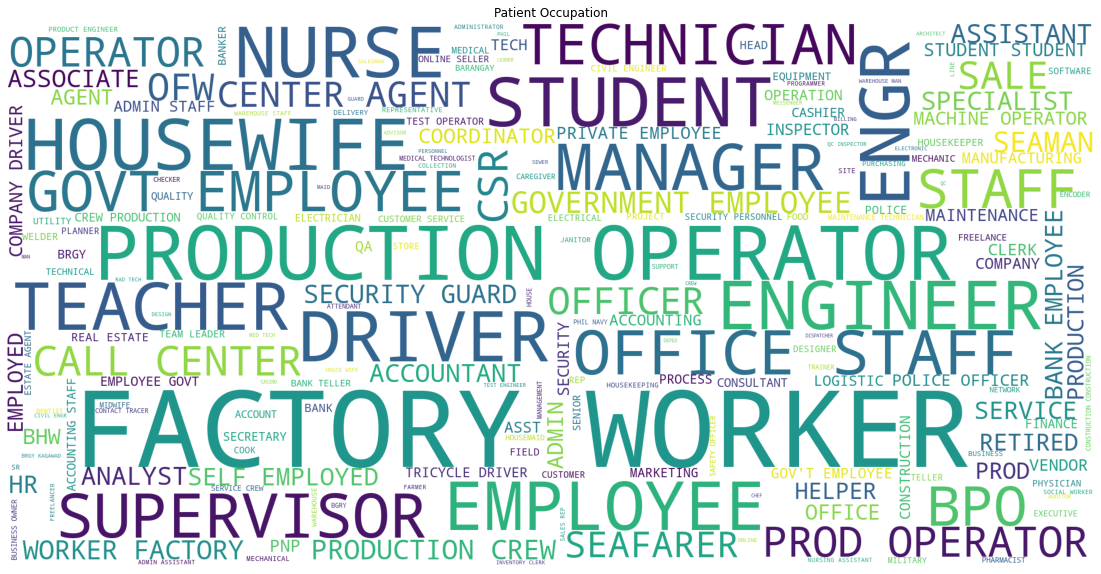

In [20]:
# reading occupation file
text = open('ConOccupationList.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Patient Occupation')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
# replacing all 'N' values to 'N/A'
OccupationList = np.array(SimpConCases_df['OCCUPATION'].replace('N', 'N/A'))

# counting occurances of an occupation
stringFilter = Counter(OccupationList)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 6282),
 ('FACTORY WORKER', 486),
 ('STUDENT', 243),
 ('PRODUCTION OPERATOR', 205),
 ('HOUSEWIFE', 182),
 ('NURSE', 148),
 ('DRIVER', 145),
 ('TEACHER', 143),
 ('EMPLOYEE', 139),
 ('OFFICE STAFF', 136),
 ('PROD OPERATOR', 111),
 ('CSR', 111),
 ('BPO', 96),
 ('GOVERNMENT EMPLOYEE', 87),
 ('SEAFARER', 86),
 ('CALL CENTER AGENT', 85),
 ('OFW', 84),
 ('GOVT EMPLOYEE', 84),
 ('ENGINEER', 80),
 ('TECHNICIAN', 80),
 ('SEAMAN', 75),
 ('ENGR', 75),
 ('PRODUCTION CREW', 61),
 ('SECURITY GUARD', 59),
 ('OPERATOR', 58),
 ('BANK EMPLOYEE', 56),
 ('SELF EMPLOYED', 54),
 ('ACCOUNTANT', 53),
 ('GOVT. EMPLOYEE', 52),
 ('IT', 45),
 ('SUPERVISOR', 42),
 ('BHW', 41),
 ('COMPANY DRIVER', 38),
 ('EMPLOYED', 38),
 ('PRIVATE EMPLOYEE', 37),
 ('MACHINE OPERATOR', 35),
 ('MANAGER', 35),
 ('PNP', 34),
 ('POLICE OFFICER', 32),
 ('ADMIN STAFF', 27),
 ('RETIRED', 27),
 ('CALL CENTER', 26),
 ('TRICYCLE DRIVER', 25),
 ("GOV'T EMPLOYEE", 24),
 ('VENDOR', 23),
 ('HELPER', 20),
 ('ACCOUNTING STAFF', 20),
 ('MAIN

###### Other Symptoms

In [22]:
# Making an other symptoms list
data = [words for words in SimpConCases_df['OTHER SYMPTOMS']]

# Creating and writting the other symptoms information
with open("ConOtherSymptoms.txt", "w") as data_file:

  for discription in data:
      
      data_file.write(discription + '\n')

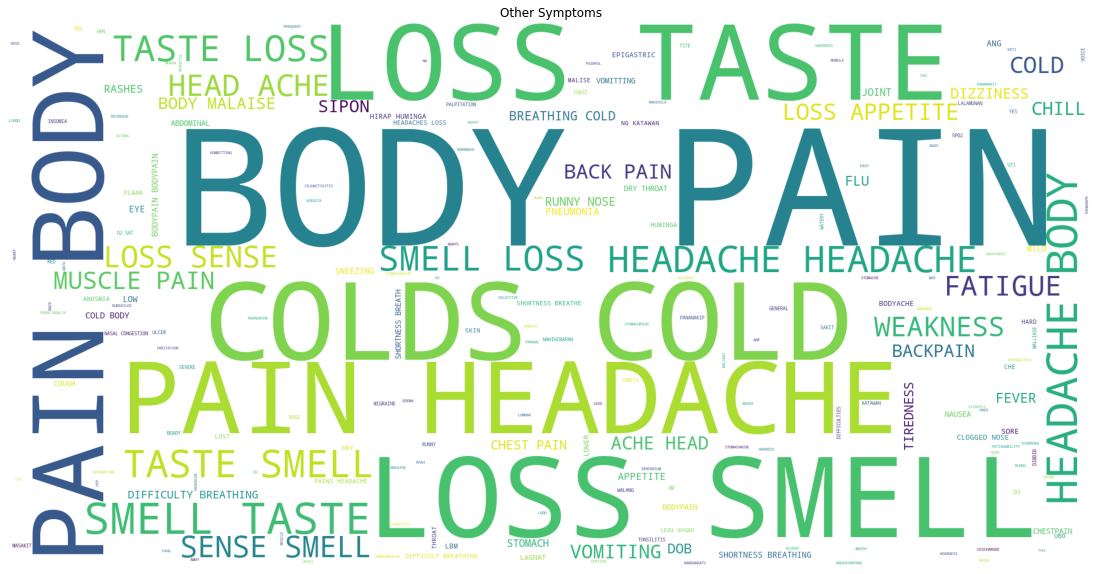

In [23]:
# reading occupation file
text = open('ConOtherSymptoms.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Other Symptoms')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()    

In [24]:
# replacing all 'N' values to 'N/A'
OtherSymptoms = np.array(SimpConCases_df['OTHER SYMPTOMS'].replace('N', 'N/A').replace('NO', 'N/A'))

# counting occurances of a symptom
stringFilter = Counter(OtherSymptoms)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 11508),
 ('BODY PAIN', 359),
 ('COLDS', 357),
 ('HEADACHE', 281),
 ('LOSS OF SMELL', 80),
 ('LOSS OF SMELL AND TASTE', 76),
 ('LOSS OF TASTE AND SMELL', 76),
 ('HEAD ACHE', 62),
 ('HEADACHE BODY PAIN', 56),
 ('LOSS OF TASTE', 53),
 ('LOSS OF SENSE OF SMELL AND TASTE', 35),
 ('COLD', 33),
 ('LOSS OF APPETITE', 28),
 ('BODY PAIN HEADACHE', 28),
 ('SIPON', 23),
 ('MUSCLE PAIN', 22),
 ('BODY MALAISE', 19),
 ('FATIGUE', 19),
 ('LOSS OF SENSE OF SMELL', 17),
 ('BACK PAIN', 17),
 ('BACKPAIN', 16),
 ('WEAKNESS', 15),
 ('BODYPAIN', 14),
 ('FLU', 13),
 ('BODY WEAKNESS', 12),
 ('BODY ACHE', 12),
 ('DOB', 12),
 ('CHILLS', 11),
 ('VOMITING', 10),
 ('FEVER', 10),
 ('COLDS, BODY PAIN', 10),
 ('LOSS OF SMELL & TASTE', 9),
 ('HEADACHE FATIGUE', 9),
 ('RUNNY NOSE', 9),
 ('PNEUMONIA', 8),
 ('WEAKNESS FATIGUE', 7),
 ('TIREDNESS', 7),
 ('DIFFICULTY IN BREATHING', 6),
 ('RASHES', 6),
 ('CHEST PAIN', 6),
 ('HEADACHE, BODY PAIN', 6),
 ('HEADACHE, MUSCLE PAIN', 5),
 ('LOSS OF SENSE OF SMELL AND TASTE 

##### Probable Cases

###### Occupation

In [25]:
# Making an occupation list
data = [words for words in SimpProCases_df['OCCUPATION']]

# Creating and writting the occupation information
with open("ProOccupationList.txt", "w") as data_file:

  for discription in data:

      data_file.write(discription + '\n')

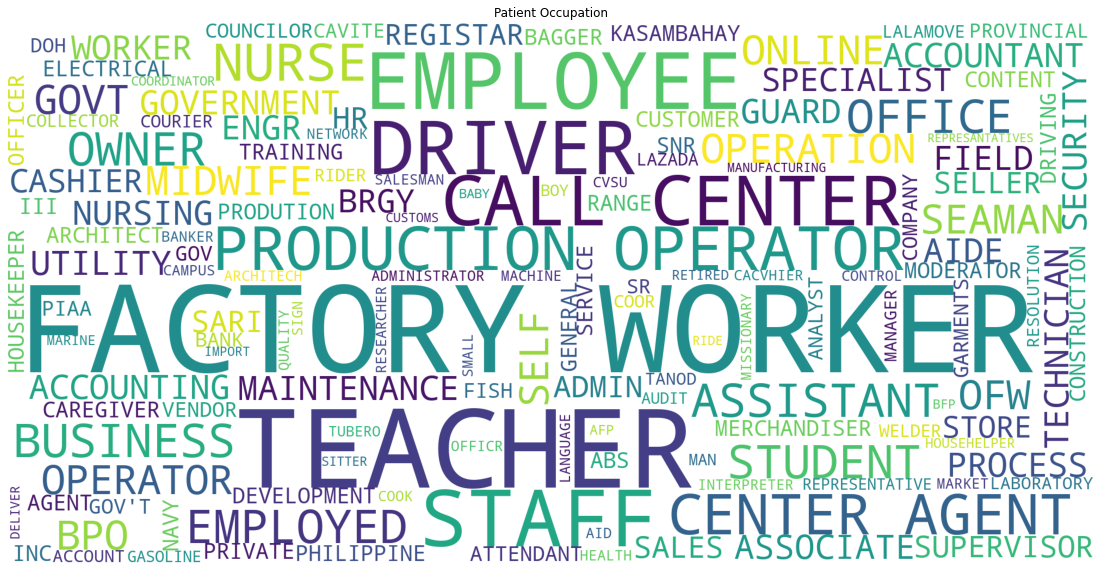

In [26]:

# reading occupation file
text = open('ProOccupationList.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Patient Occupation')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
# replacing all 'N' values to 'N/A'
OccupationList = np.array(SimpProCases_df['OCCUPATION'].replace('N', 'N/A'))

# counting occurances of an occupation
stringFilter = Counter(OccupationList)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 551),
 ('FACTORY WORKER', 24),
 ('TEACHER', 20),
 ('DRIVER', 7),
 ('PRODUCTION OPERATOR', 7),
 ('CALL CENTER AGENT', 6),
 ('NURSE', 5),
 ('STUDENT', 4),
 ('GOVT. EMPLOYEE', 3),
 ('OFFICE STAFF', 3),
 ('SEAMAN', 3),
 ('MIDWIFE', 3),
 ('OFW', 3),
 ('SELF EMPLOYED', 3),
 ('UTILITY', 2),
 ('BPO', 2),
 ('GOVERNMENT EMPLOYEE', 2),
 ('ACCOUNTANT', 2),
 ('PROCESS ENGR.', 2),
 ('TECHNICIAN', 2),
 ('SECURITY GUARD', 2),
 ('CASHIER', 2),
 ('SUPERVISOR', 2),
 ('ONLINE SELLER', 2),
 ('REGISTAR', 2),
 ('MERCHANDISER', 1),
 ('GENERAL ACCOUNTING STAFF', 1),
 ('CAREGIVER', 1),
 ('ARCHITECT', 1),
 ('BPO AGENT', 1),
 ('PRIVATE EMPLOYEE', 1),
 ('TRAINING STAFF', 1),
 ('KASAMBAHAY', 1),
 ('PRODUTION STAFF', 1),
 ('ELECTRICAL MAINTENANCE', 1),
 ('PHILIPPINE NAVY', 1),
 ('BUSINESS DEVELOPMENT STAFF', 1),
 ('CONSTRUCTION WORKER', 1),
 ('CONTENT MODERATOR', 1),
 ('HOUSEKEEPER', 1),
 ('NURSING AIDE', 1),
 ('CUSTOMER SERVICE ASSOCIATE', 1),
 ('FIELD OFFICER', 1),
 ('OPERATIONS SNR SPECIALIST III', 1),
 

###### Other Symptoms

In [28]:
# Making an occupation list
data = [words for words in SimpProCases_df['OTHER SYMPTOMS']]

# Creating and writting the occupation information
with open("ProOtherSymptoms.txt", "w") as data_file:

  for discription in data:

      data_file.write(discription + '\n')


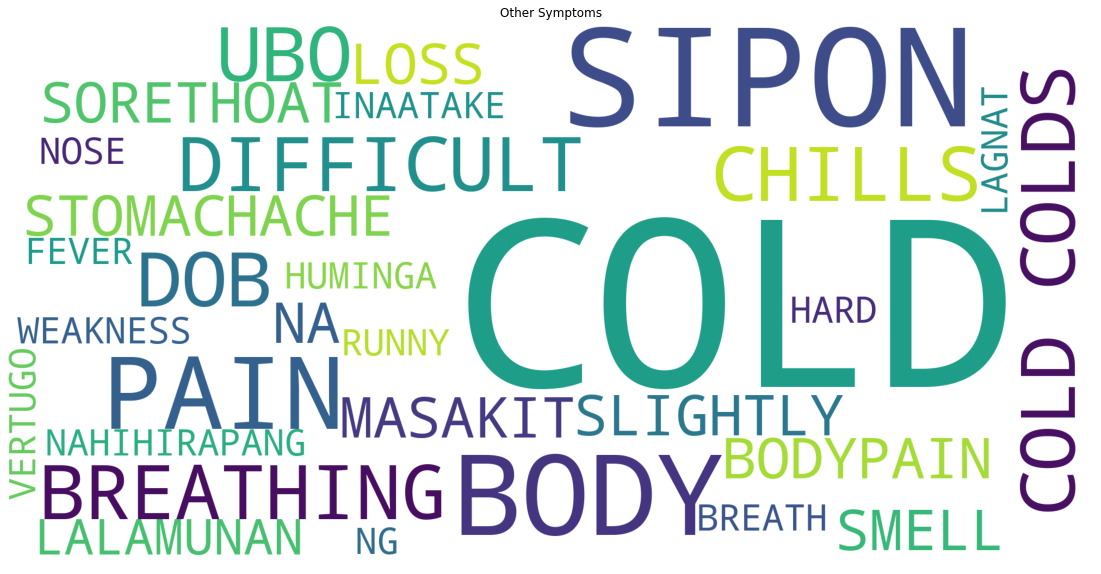

In [29]:
# reading occupation file
text = open('ProOtherSymptoms.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Other Symptoms')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
# replacing all 'N' values to 'N/A'
OtherSymptoms = np.array(SimpProCases_df['OTHER SYMPTOMS'].replace('N', 'N/A').replace('NO', 'N/A'))

# counting occurances of symptoms
stringFilter = Counter(OtherSymptoms)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 678),
 ('COLDS', 41),
 ('SIPON', 4),
 ('COLD', 2),
 ('DIFFICULT OF BREATHING', 2),
 ('COLDS; BODY PAIN', 2),
 ('DOB', 2),
 ('COLD. SLIGHTLY LOSS OF SMELL', 1),
 ('STOMACHACHE', 1),
 ('COLDS, SORETHOAT AND BODYPAIN', 1),
 ('BODY PAIN', 1),
 ('MASAKIT NA LALAMUNAN', 1),
 ('NAHIHIRAPANG HUMINGA', 1),
 ('HARD TO BREATH', 1),
 ('COLDS AND CHILLS', 1),
 ('COLDS, BODY WEAKNESS', 1),
 ('CHILLS', 1),
 ('SIPON UBO', 1),
 ('SIPON,LAGNAT', 1),
 ('INAATAKE NG VERTUGO', 1),
 ('UBO,SIPON', 1),
 ('SIPON,BODY PAIN', 1),
 ('RUNNY NOSE', 1),
 ('FEVER', 1)]

##### Suspected Cases

###### Occupation

In [31]:
# Making an occupation list
data = [words for words in SimpSusCases_df['OCCUPATION']]

# Creating and writting the occupation information
with open("SusOccupationList.txt", "w") as data_file:

  for discription in data:

      data_file.write(discription + '\n')


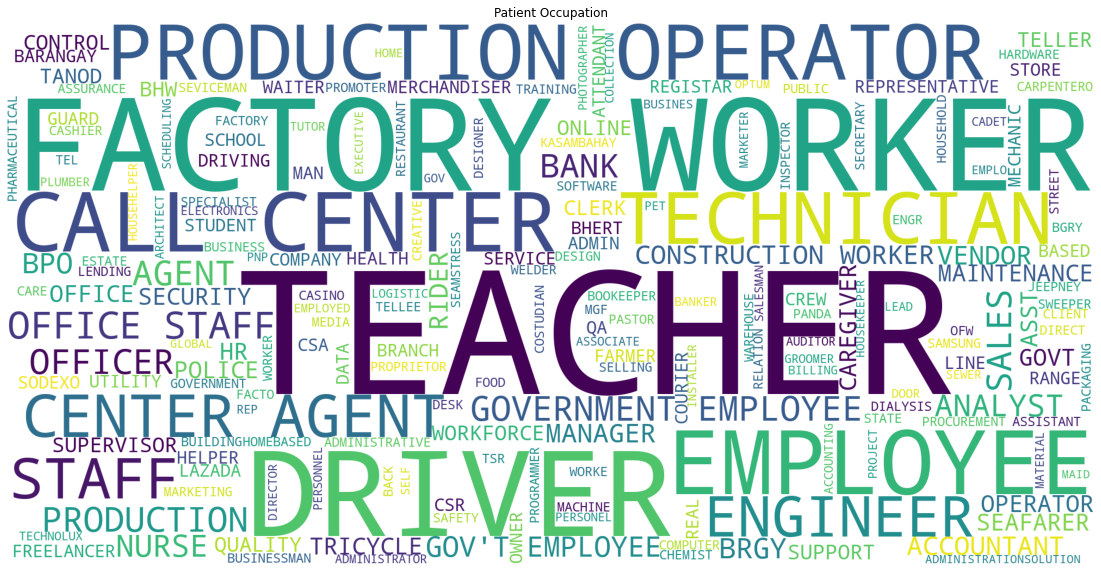

In [32]:
# reading occupation file
text = open('SusOccupationList.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Patient Occupation')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
# replacing all 'N' values to 'N/A'
OccupationList = np.array(SimpSusCases_df['OCCUPATION'].replace('N', 'N/A'))

# counting occurances of an occupation
stringFilter = Counter(OccupationList)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 1292),
 ('TEACHER', 33),
 ('FACTORY WORKER', 24),
 ('PRODUCTION OPERATOR', 15),
 ('DRIVER', 14),
 ('CALL CENTER AGENT', 12),
 ('OFFICE STAFF', 10),
 ('GOVERNMENT EMPLOYEE', 9),
 ('TECHNICIAN', 8),
 ('EMPLOYEE', 6),
 ("GOV'T EMPLOYEE", 6),
 ('NURSE', 6),
 ('ENGINEER', 6),
 ('BANK EMPLOYEE', 5),
 ('ACCOUNTANT', 5),
 ('VENDOR', 5),
 ('CONSTRUCTION WORKER', 5),
 ('TRICYCLE DRIVER', 4),
 ('GOVT EMPLOYEE', 4),
 ('SEAFARER', 4),
 ('CAREGIVER', 4),
 ('PRODUCTION STAFF', 3),
 ('SALES', 3),
 ('RIDER', 3),
 ('BPO AGENT', 3),
 ('IT', 3),
 ('TELLER', 2),
 ('FARMER', 2),
 ('COMPANY DRIVER', 2),
 ('WAITER', 2),
 ('CALL CENTER', 2),
 ('FREELANCER', 2),
 ('STUDENT', 2),
 ('DRIVING RANGE ATTENDANT', 2),
 ('MECHANIC', 2),
 ('BRGY TANOD', 2),
 ('DATA ANALYST', 2),
 ('OPERATOR', 2),
 ('SODEXO', 2),
 ('BHW', 2),
 ('CSR', 2),
 ('SECURITY GUARD', 2),
 ('MERCHANDISER', 2),
 ('SALES AGENT', 2),
 ('HR STAFF', 2),
 ('SUPERVISOR', 2),
 ('PRODUCTION ENGINEER', 2),
 ('BPO EMPLOYEE CALL CENTER', 2),
 ('CSA',

###### Other Symptoms

In [34]:
# Making an other symptoms list
data = [words for words in SimpSusCases_df['OTHER SYMPTOMS']]

# Creating and writting the other symptoms information
with open("SusOtherSymptoms.txt", "w") as data_file:

  for discription in data:

      data_file.write(discription + '\n')


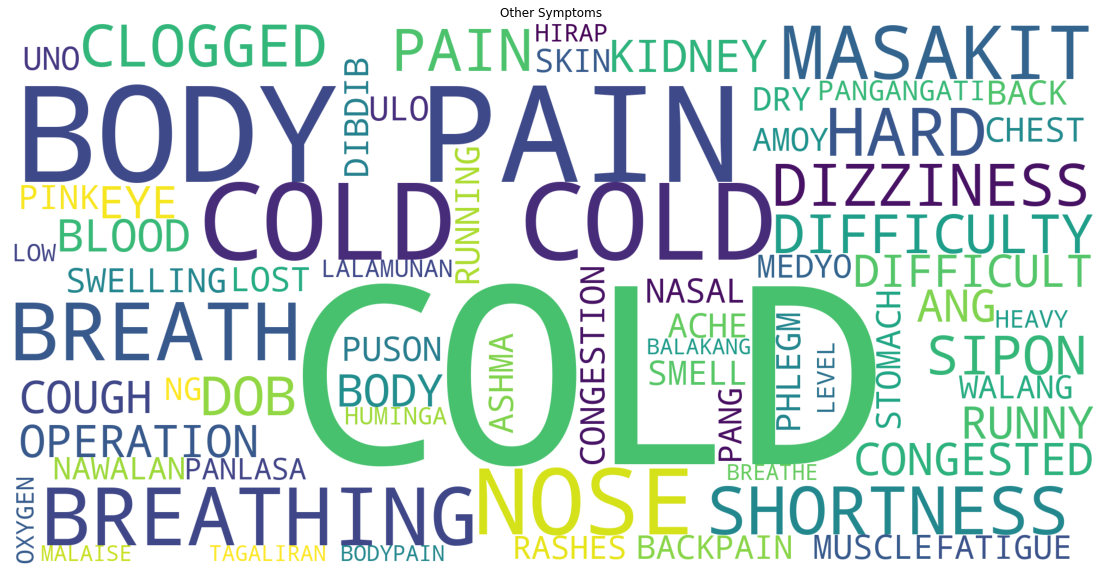

In [35]:
# reading occupation file
text = open('SusOtherSymptoms.txt', 'r')
OccupationList = text.read()

# using word cloud to visualize the data
plt.figure(figsize=(20,10))
wordcloud = wc(background_color='white', mode='RGB', width = 2000, height = 1000).generate(OccupationList)
plt.title('Other Symptoms')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
# replacing all 'N' values to 'N/A'
OtherSymptoms = np.array(SimpSusCases_df['OTHER SYMPTOMS'].replace('N', 'N/A').replace('NO', 'N/A'))

# counting occurances of a symptom
stringFilter = Counter(OtherSymptoms)

# sorting the counted list from largest to smallest
stringFilter = stringFilter.most_common()
stringFilter

[('N/A', 1460),
 ('COLDS', 153),
 ('COLD', 15),
 ('BODY PAIN', 6),
 ('CLOGGED NOSE', 3),
 ('DIZZINESS', 3),
 ('SHORTNESS OF BREATH', 3),
 ('COLDS, BODY PAIN', 3),
 ('KIDNEY OPERATION', 2),
 ('DIFFICULT OF BREATHING', 2),
 ('DIFFICULTY IN BREATHING', 2),
 ('RUNNY NOSE', 2),
 ('LOST OF SMELL', 1),
 ('SWELLING OF EYE', 1),
 ('STOMACH ACHE', 1),
 ('MASAKIT DIBDIB', 1),
 ('CHEST PAIN, BACK PAIN, SHORTNESS OF BREATHING', 1),
 ('PINK EYE', 1),
 ('ASHMA', 1),
 ('NASAL CONGESTION', 1),
 ('RUNNING NOSE', 1),
 ('COUGH COLDS', 1),
 ('MASAKIT PUSON ,MASAKIT ULO', 1),
 ('PHLEGM WITH BLOOD', 1),
 ('HARD TO BREATH', 1),
 ('MUSCLE PAIN', 1),
 ('DIFFICULTY IN BREATHING, BODY PAIN', 1),
 ('BACKPAIN', 1),
 ('SIPON', 1),
 ('COUGH WITH BLOOD', 1),
 ('COLD HARD TO BREATH', 1),
 ('COLDS HARD TO BREATH', 1),
 ('DRY COLD', 1),
 ('DOB AND COLDS', 1),
 ('FATIGUE', 1),
 ('SIPON,WALANG PANG AMOY', 1),
 ('COLD/SKIN RASHES', 1),
 ('UNO,SIPON ,MEDYO NAWALAN NG PANLASA', 1),
 ('PANGANGATI LALAMUNAN', 1),
 ('DOB; BODY P

### Sentiment Analysis

In [37]:
!pip install vaderSentiment
!pip install caching

#### Preprocessing

In [38]:
import textblob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [39]:
# creating list of selected fields
FocalColumn = ['SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)', 
'PREGNANT (Y/N)', 'ONSET OF ILLNESS', 'FEVER(Y/N)' , 'COYGH (Y/N)', 'COYGH(Y/N)', 'COLDS (Y/N)', 'COLDS(Y/N)', 
'DOB(Y/N)', 'DOB (Y/N)', 'LOSS OF SMELL(Y/N)','LOSS OF SMELL (Y/N)', 'LOSS OF TASTE (Y/N)', 'SORETHROAT (Y/N)', 
'DIARRHEA(Y/N)', 'DIARRHEA (Y/N)', 'OTHER SYMPTOMS', 'WITH COMORBIDITY (Y/N)', 
'COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)',
'DATE OF SPECIMEN COLLECTION', 'ANTIGEN (POSITIVE/NEGATIVE)',
'PCR(POSITIVE/NEGATIVE)', 'RDT(+IGG, +IGM,NEGATIVE)',
'CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)']

remove = ['ONSET OF ILLNESS', 'PREGNANT (Y/N)']  		

In [40]:
# function for creating dataframe with the above columns
def Create(origin_df):
  
  dataframe = origin_df.filter(['LAST NAME'])
  
  for x in FocalColumn:
    
    if x in origin_df.columns:

      dataframe[x] = origin_df[x]

  return dataframe
################################################################################################
# function to remover the study target column
def drop_columns(dataframe):

  dataframe.drop(columns=['CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)'], inplace=True)
  
  for i in remove:
    dataframe.drop(columns=[i], inplace=True)

  return dataframe  

In [41]:
# creating dataframes
ConCases_df = Create(ConfirmedCases_df)
ProCases_df = Create(ProbableCases_df)
SusCases_df = Create(SuspectedCases_df)

In [42]:
# filling NaN values and replacing letter y and n with yes and no
ConCases_df = ConCases_df.loc[0:13860].fillna('not recorded').replace('Y', 'YES').replace('N', 'NO')
ConCases_df = drop_columns(ConCases_df)

ProCases_df = ProCases_df.loc[0:747].fillna('not recorded').replace('Y', 'YES').replace('N', 'NO')
ProCases_df = drop_columns(ProCases_df)

SusCases_df = SusCases_df.loc[0:1691].fillna('not recorded').replace('Y', 'YES').replace('N', 'NO')
SusCases_df = drop_columns(SusCases_df)


Sample Output

In [43]:
ConCases_df.head()

,LAST NAME,"SEVERITY OF THE CASE (ASYMTOMATIC,MILD,MODERATE,SEVERE,CRITICAL)",FEVER(Y/N),COYGH(Y/N),COLDS(Y/N),DOB(Y/N),LOSS OF SMELL(Y/N),LOSS OF TASTE (Y/N),SORETHROAT (Y/N),DIARRHEA(Y/N),OTHER SYMPTOMS,WITH COMORBIDITY (Y/N),"COMORBIDITY (HYPERTENSIVE, DIABETIC, WITH HEART PROBLEM, AND OTHERS)",DATE OF SPECIMEN COLLECTION,ANTIGEN (POSITIVE/NEGATIVE),PCR(POSITIVE/NEGATIVE),"RDT(+IGG, +IGM,NEGATIVE)"
0,Patient 1,ASYMPTOMATIC,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,07/25/2020,not recorded,2019-Ncov Viral RNA Detected,not recorded
1,Patient 2,SYMPTOMATIC,YES,YES,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,BODY PAIN,not recorded,not recorded,07/14/2020,not recorded,2019-Ncov Viral RNA Detected,not recorded
2,Patient 3,ASYMPTOMATIC,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,07/25/2020,not recorded,2019-Ncov Viral RNA Detected,not recorded
3,Patient 4,ASYMPTOMATIC,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,07/23/2020,not recorded,2019-Ncov Viral RNA Detected,not recorded
4,Patient 5,ASYMPTOMATIC,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,not recorded,07/23/2020,not recorded,2019-Ncov Viral RNA Detected,not recorded


In [44]:
# function to create strings of all the primary records
def create_statements(dataframe):
  stat_list = []

  for count in range (len(dataframe['LAST NAME'])): 

    statement = dataframe.iloc[count].to_string().lower()
    stat_list.append(statement)
    
  return stat_list

In [45]:
# recrating dataframes with the above functions 
StringConCases = pd.DataFrame(create_statements(ConCases_df), columns = ['REPORT'])
StringProCases = pd.DataFrame(create_statements(ProCases_df), columns = ['REPORT'])
StringSusCases = pd.DataFrame(create_statements(SusCases_df), columns = ['REPORT'])

In [46]:
# function for adding the study target column
def add_semcol(dataframe, origin_df):
  dataframe['CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)'] = origin_df['CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)'].replace('CONFIRMED CASE', 'confirmed cases').fillna(('confirmed cases'))
  return dataframe

In [47]:
# adding the study target column
StringConCases = add_semcol(StringConCases, ConfirmedCases_df)
StringProCases = add_semcol(StringProCases, ProbableCases_df)
StringSusCases = add_semcol(StringSusCases, SuspectedCases_df)

##### Text Cleaning

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import TextDisplayObject
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import text_to_word_sequence

In [49]:
le = LabelEncoder()

In [50]:
# function to tokenize the data
def tokenize(dataframe):

  tokenizer_s = Tokenizer()

  s_texts = dataframe['REPORT'].values

  tokenizer_s.fit_on_texts(s_texts)

  Sentword_index = tokenizer_s.word_index

  sentence_sequences = tokenizer_s.texts_to_sequences(s_texts)
  result_sequences = le.fit_transform(dataframe['CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)'])

  dataframe['SEQUENCED TOKENS'] = sentence_sequences
  dataframe['SEQUENCED RESULT'] = result_sequences

  return dataframe

In [51]:
# tokenizing the record dataframe
StringConCases = tokenize(StringConCases)
StringProCases = tokenize(StringProCases) 
StringSusCases = tokenize(StringSusCases) 

Sample output

In [52]:
StringConCases.head()

,REPORT,"CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)",SEQUENCED TOKENS,SEQUENCED RESULT
0,"last name patient 1 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/25/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 136, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 4, 5, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 74, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, ...]",2
1,"last name patient 2 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) symptomatic \nfever(y/n) yes \ncoygh(y/n) yes \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms body pain \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/14/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 142, 34, 6, 27, 35, 36, 12, 20, 22, 25, 54, 19, 1, 2, 47, 37, 1, 2, 47, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 67, 65, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 83, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, 45, 7, ...]",2
2,"last name patient 3 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/25/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 125, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 4, 5, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 74, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, ...]",2
3,"last name patient 4 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/23/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 147, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5, 13, 1, 2, 4, 5, 18, 1

In [53]:
# Creating a numeric sequence of the string statement
PaddedConCases = pad_sequences(StringConCases['SEQUENCED TOKENS'].values)
PaddedProCases = pad_sequences(StringProCases['SEQUENCED TOKENS'].values,dtype=np.float, padding='pre', truncating='pre')
PaddedSusCases = pad_sequences(StringSusCases['SEQUENCED TOKENS'].values,dtype=np.float, padding='pre', truncating='pre')

#### Model Training

In [54]:
# creating and splitting out training and testing data
training_sentences = StringConCases['SEQUENCED TOKENS'][0:5000]
testing_sentences = StringConCases['SEQUENCED TOKENS'][5000:]

training_result = StringConCases['SEQUENCED RESULT'][0:5000]
testing_result = StringConCases['SEQUENCED RESULT'][5000:]

training_padded = pad_sequences(training_sentences,dtype=np.float, padding='pre', truncating='pre') 
testing_padded = pad_sequences(testing_sentences,dtype=np.float, padding='pre', truncating='pre')

In [55]:
# Assigning a model to fit
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(15000, 3),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                            ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Fitting our model
model.fit(training_padded, training_result, epochs=200, validation_data=(testing_padded, testing_result), verbose=2)

Epoch 1/200
157/157 - 3s - loss: -1.3109e-01 - accuracy: 0.0022 - val_loss: -1.5317e+00 - val_accuracy: 0.0000e+00 - 3s/epoch - 18ms/step
Epoch 2/200
157/157 - 1s - loss: -4.2980e+00 - accuracy: 0.0022 - val_loss: -8.2762e+00 - val_accuracy: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 3/200
157/157 - 1s - loss: -1.5586e+01 - accuracy: 0.0022 - val_loss: -2.5256e+01 - val_accuracy: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 4/200
157/157 - 2s - loss: -3.9813e+01 - accuracy: 0.0022 - val_loss: -5.7513e+01 - val_accuracy: 0.0000e+00 - 2s/epoch - 11ms/step
Epoch 5/200
157/157 - 1s - loss: -8.1280e+01 - accuracy: 0.0022 - val_loss: -1.0880e+02 - val_accuracy: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 6/200
157/157 - 1s - loss: -1.4340e+02 - accuracy: 0.0022 - val_loss: -1.8218e+02 - val_accuracy: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 7/200
157/157 - 1s - loss: -2.2898e+02 - accuracy: 0.0022 - val_loss: -2.8022e+02 - val_accuracy: 0.0000e+00 - 1s/epoch - 7ms/step
Epoch 8/200
157/157 - 1s - loss: -3.404



---


Model Fitting Summary

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 3)           45000     
                                                                 
 global_average_pooling1d (G  (None, 3)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                96        
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 45,121
Trainable params: 45,121
Non-trainable params: 0
_________________________________________________________________


In [58]:
# function for predicting the results based on the trained model
def prediction(padded_sequences):

  modpred = model.predict(padded_sequences, 1)

  return modpred

In [59]:
# applying the prediction function to our dataframes
StringConCases['PREDICTION'] = prediction(PaddedConCases)
StringProCases['PREDICTION'] = prediction(PaddedProCases)
StringSusCases['PREDICTION']  = prediction(PaddedSusCases)



---


#### Output

##### Confirmed Cases

In [60]:
StringConCases.head()

,REPORT,"CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)",SEQUENCED TOKENS,SEQUENCED RESULT,PREDICTION
0,"last name patient 1 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/25/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 136, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 4, 5, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 74, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, ...]",2,1.0
1,"last name patient 2 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) symptomatic \nfever(y/n) yes \ncoygh(y/n) yes \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms body pain \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/14/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 142, 34, 6, 27, 35, 36, 12, 20, 22, 25, 54, 19, 1, 2, 47, 37, 1, 2, 47, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 67, 65, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 83, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, 45, 7, ...]",2,1.0
2,"last name patient 3 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/25/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 125, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5, 13, 1, 2, 4, 5, 18, 1, 2, 4, 5, 9, 6, 14, 1, 2, 4, 5, 9, 6, 15, 1, 2, 4, 5, 28, 1, 2, 4, 5, 24, 1, 2, 4, 5, 38, 39, 4, 5, 10, 11, 1, 2, 4, 5, 11, 29, 26, 10, 21, 23, 16, 40, 4, 5, 41, 6, 30, 42, 59, 74, 58, 17, 8, 7, 4, 5, 31, 8, 7, 52, 48, 49, 50, 51, 43, 44, ...]",2,1.0
3,"last name patient 4 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic \nfever(y/n) not recorded \ncoygh(y/n) not recorded \ncolds(y/n) not recorded \ndob(y/n) not recorded \nloss of smell(y/n) not recorded \nloss of taste (y/n) not recorded \nsorethroat (y/n) not recorded \ndiarrhea(y/n) not recorded \nother symptoms not recorded \nwith comorbidity (y/n) not recorded \ncomorbidity (hypertensive, diabetic, with heart problem, and others) not recorded \ndate of specimen collection 07/23/2020 \nantigen (positive/negative) not recorded \npcr(positive/negative) 2019-ncov viral rna detected\nrdt(+igg, +igm,negative) not recorded",confirmed cases,"[32, 33, 46, 147, 34, 6, 27, 35, 36, 12, 20, 22, 25, 55, 19, 1, 2, 4, 5, 37, 1, 2, 4, 5

##### Probable Cases

In [61]:
StringProCases.head()

,REPORT,"CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)",SEQUENCED TOKENS,SEQUENCED RESULT,PREDICTION
0,"last name patient 1 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/14/2021 \nantigen (positive/negative) not recorded\npcr(positive/negative) pending \nrdt(+igg, +igm,negative) not recorded",PROBABLE,"[18, 19, 20, 72, 21, 4, 22, 23, 24, 12, 25, 26, 27, 52, 16, 2, 3, 1, 28, 2, 3, 1, 13, 2, 3, 1, 14, 2, 3, 1, 8, 4, 17, 2, 3, 1, 8, 4, 29, 2, 3, 1, 30, 2, 3, 1, 31, 2, 3, 1, 32, 33, 6, 7, 9, 10, 2, 3, 1, 10, 34, 35, 9, 36, 37, 15, 38, 1, 39, 4, 40, 41, 42, 65, 43, 44, 11, 5, 6, 7, 45, 11, 5, 46, 47, 48, 49, 5, 6, 7]",0,1.0
1,"last name patient 2 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/15/2021 \nantigen (positive/negative) not recorded\npcr(positive/negative) pending \nrdt(+igg, +igm,negative) not recorded",PROBABLE,"[18, 19, 20, 73, 21, 4, 22, 23, 24, 12, 25, 26, 27, 52, 16, 2, 3, 1, 28, 2, 3, 1, 13, 2, 3, 1, 14, 2, 3, 1, 8, 4, 17, 2, 3, 1, 8, 4, 29, 2, 3, 1, 30, 2, 3, 1, 31, 2, 3, 1, 32, 33, 6, 7, 9, 10, 2, 3, 1, 10, 34, 35, 9, 36, 37, 15, 38, 1, 39, 4, 40, 41, 42, 56, 43, 44, 11, 5, 6, 7, 45, 11, 5, 46, 47, 48, 49, 5, 6, 7]",0,1.0
2,"last name patient 3 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/15/2021 \nantigen (positive/negative) not recorded\npcr(positive/negative) pending \nrdt(+igg, +igm,negative) not recorded",PROBABLE,"[18, 19, 20, 74, 21, 4, 22, 23, 24, 12, 25, 26, 27, 52, 16, 2, 3, 1, 28, 2, 3, 1, 13, 2, 3, 1, 14, 2, 3, 1, 8, 4, 17, 2, 3, 1, 8, 4, 29, 2, 3, 1, 30, 2, 3, 1, 31, 2, 3, 1, 32, 33, 6, 7, 9, 10, 2, 3, 1, 10, 34, 35, 9, 36, 37, 15, 38, 1, 39, 4, 40, 41, 42, 56, 43, 44, 11, 5, 6, 7, 45, 11, 5, 46, 47, 48, 49, 5, 6, 7]",0,1.0
3,"last name patient 4 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) mild -symptomatic\nfever(y/n) no \ncoygh (y/n) yes \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded \nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/15/2021 \nantigen (positive/negative) not recorded \npcr(positive/negative) pending \nrdt(+igg, +igm,negative) not recorded",PROBABLE,"[18, 19, 20, 75, 21, 4, 22, 23, 24, 12, 25, 26, 27, 12, 51, 16, 2, 3, 1, 28, 2, 3, 50, 13, 2, 3, 1, 14, 2, 3, 1, 8, 4, 17, 2, 3, 1, 8, 4, 29, 2, 3, 1, 30, 2, 3, 1, 31, 2, 3, 1, 32, 33, 6, 7, 9, 10, 2, 3, 1, 10, 34, 35, 9, 36, 37, 15, 38, 1, 39, 4, 40, 41, 42, 56, 43, 44, 11, 5, 6, 7, 45, 11, 5, 46, 47, 48, 49, 5, 6, 7]",0,1.0
4,"last name patient 5 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabet

##### Suspected Cases

In [62]:
StringSusCases.head()

,REPORT,"CLASSIFICATION (CONFIRMED,SUSPECTED,PROBABLE,FOR VALIDATION)",SEQUENCED TOKENS,SEQUENCED RESULT,PREDICTION
0,"last name pasyente 1 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/14/2021 \nantigen (positive/negative) not recorded\npcr(positive/negative) not recorded\nrdt(+igg, +igm,negative) not recorded",SUSPECTED,"[18, 19, 20, 90, 21, 4, 22, 23, 24, 12, 25, 26, 27, 50, 28, 2, 3, 1, 29, 2, 3, 1, 13, 2, 3, 1, 15, 2, 3, 1, 9, 4, 16, 2, 3, 1, 9, 4, 30, 2, 3, 1, 31, 2, 3, 1, 32, 2, 3, 1, 33, 34, 5, 6, 8, 10, 2, 3, 1, 10, 35, 36, 8, 37, 38, 17, 39, 1, 40, 4, 41, 42, 43, 52, 44, 14, 11, 7, 5, 6, 45, 11, 7, 5, 6, 46, 47, 48, 7, 5, 6]",0,1.0
1,"last name pasyente 2 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/14/2021 \nantigen (positive/negative) not recorded\npcr(positive/negative) not recorded\nrdt(+igg, +igm,negative) not recorded",SUSPECTED,"[18, 19, 20, 91, 21, 4, 22, 23, 24, 12, 25, 26, 27, 50, 28, 2, 3, 1, 29, 2, 3, 1, 13, 2, 3, 1, 15, 2, 3, 1, 9, 4, 16, 2, 3, 1, 9, 4, 30, 2, 3, 1, 31, 2, 3, 1, 32, 2, 3, 1, 33, 34, 5, 6, 8, 10, 2, 3, 1, 10, 35, 36, 8, 37, 38, 17, 39, 1, 40, 4, 41, 42, 43, 52, 44, 14, 11, 7, 5, 6, 45, 11, 7, 5, 6, 46, 47, 48, 7, 5, 6]",0,1.0
2,"last name pasyente 3 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) mild -symptomatic\nfever(y/n) yes \ncoygh (y/n) yes \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded \nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/14/2021 \nantigen (positive/negative) not recorded \npcr(positive/negative) not recorded \nrdt(+igg, +igm,negative) not recorded",SUSPECTED,"[18, 19, 20, 92, 21, 4, 22, 23, 24, 12, 25, 26, 27, 12, 51, 28, 2, 3, 49, 29, 2, 3, 49, 13, 2, 3, 1, 15, 2, 3, 1, 9, 4, 16, 2, 3, 1, 9, 4, 30, 2, 3, 1, 31, 2, 3, 1, 32, 2, 3, 1, 33, 34, 5, 6, 8, 10, 2, 3, 1, 10, 35, 36, 8, 37, 38, 17, 39, 1, 40, 4, 41, 42, 43, 52, 44, 14, 11, 7, 5, 6, 45, 11, 7, 5, 6, 46, 47, 48, 7, 5, 6]",0,1.0
3,"last name pasyente 4 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) mild -symptomatic\nfever(y/n) no \ncoygh (y/n) yes \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) yes \ndiarrhea (y/n) no \nother symptoms not recorded \nwith comorbidity (y/n) no \ncomorbidity (hypertensive, diabetic, with heart problem, and others) no \ndate of specimen collection 09/14/2021 \nantigen (positive/negative) not recorded \npcr(positive/negative) not recorded \nrdt(+igg, +igm,negative) not recorded",SUSPECTED,"[18, 19, 20, 93, 21, 4, 22, 23, 24, 12, 25, 26, 27, 12, 51, 28, 2, 3, 1, 29, 2, 3, 49, 13, 2, 3, 1, 15, 2, 3, 1, 9, 4, 16, 2, 3, 1, 9, 4, 30, 2, 3, 1, 31, 2, 3, 49, 32, 2, 3, 1, 33, 34, 5, 6, 8, 10, 2, 3, 1, 10, 35, 36, 8, 37, 38, 17, 39, 1, 40, 4, 41, 42, 43, 52, 44, 14, 11, 7, 5, 6, 45, 11, 7, 5, 6, 46, 47, 48, 7, 5, 6]",0,1.0
4,"last name pasyente 5 \nseverity of the case (asymtomatic,mild,moderate,severe,critical) asymptomatic\nfever(y/n) no \ncoygh (y/n) no \ncolds (y/n) no \ndob (y/n) no \nloss of smell (y/n) no \nloss of taste (y/n) no \nsorethroat (y/n) no \ndiarrhea (y/n) no \nother symptoms not recorded\nwith como